In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sp
import seaborn as sns
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from plotly.offline import init_notebook_mode,iplot,plot
from plotly.offline import init_notebook_mode,iplot,plot
import cufflinks as cf
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv(r'/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df=df.drop(['CustomerID'],axis=1)

In [ ]:
df=df.rename(columns={'Annual Income (k$)':'Annual_Income'})
df=df.rename(columns={'Spending Score (1-100)':'Spending_Score'})

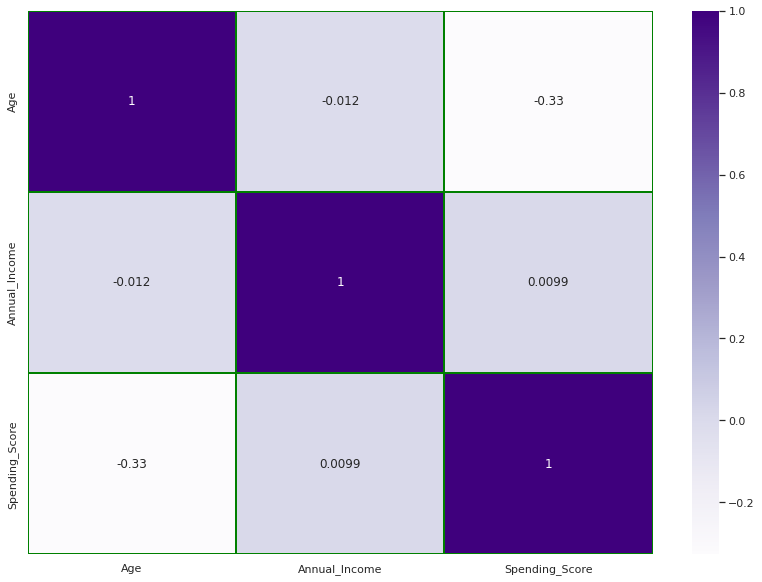

In [ ]:
plt.figure(figsize=(14,10))  #figuresize define
sns.set(font_scale=1) #fontsize 
sns.heatmap(df.corr(),cmap='Purples',annot=True,linecolor='Green',linewidth=1.0)

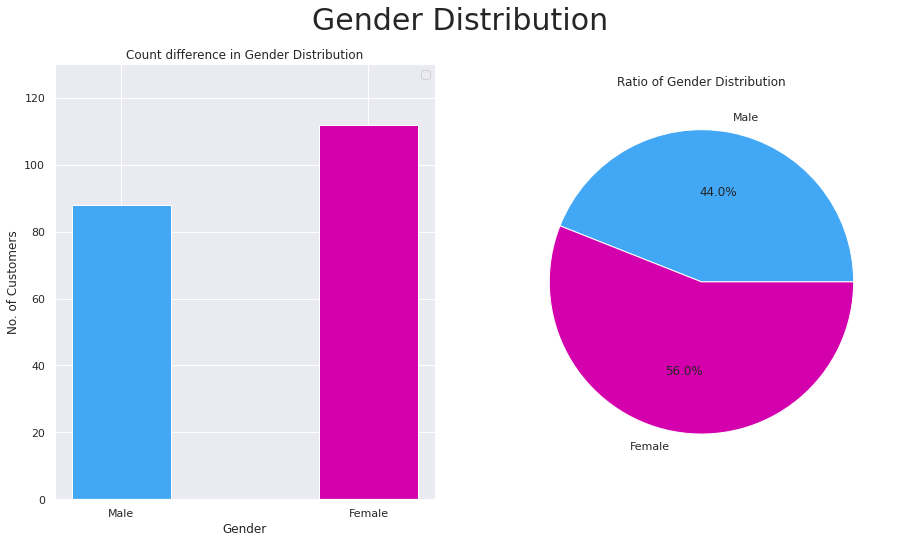

In [ ]:
labels=df['Gender'].unique()

values=df['Gender'].value_counts(ascending=True)

fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))

bar = ax0.bar(x=labels,height=values,width=0.4,align='center',color=['#42a7f5','#d400ad'])

ax0.set(title='Count difference in Gender Distribution', xlabel='Gender', ylabel='No. of Customers')

ax0.set_ylim (0,130)

ax0.legend()

ax1.pie (values, labels=labels, colors=['#42a7f5', '#d400ad'], autopct='%1.1f%%') 
ax1.set(title='Ratio of Gender Distribution')

fig.suptitle('Gender Distribution', fontsize=30)
plt.show()

In [ ]:
df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [ ]:
df[df['Gender']=='Male']['Age'].describe()

count    88.000000
mean     39.806818
std      15.514812
min      18.000000
25%      27.750000
50%      37.000000
75%      50.500000
max      70.000000
Name: Age, dtype: float64

In [ ]:
df[df['Gender']=='Female']['Age'].describe()

count    112.000000
mean      38.098214
std       12.644095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.500000
max       68.000000
Name: Age, dtype: float64

In [ ]:
male=df[df['Gender']=='Male']
female=df[df['Gender']=='female']


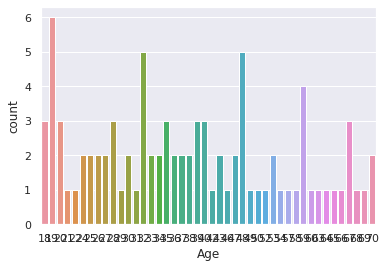

In [ ]:

sns.countplot(x ='Age', data = male)


In [ ]:
df[df['Gender']=='Male']['Age'].value_counts().head()

19    6
32    5
48    5
59    4
28    3
Name: Age, dtype: int64

In [ ]:
df.Annual_Income.describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

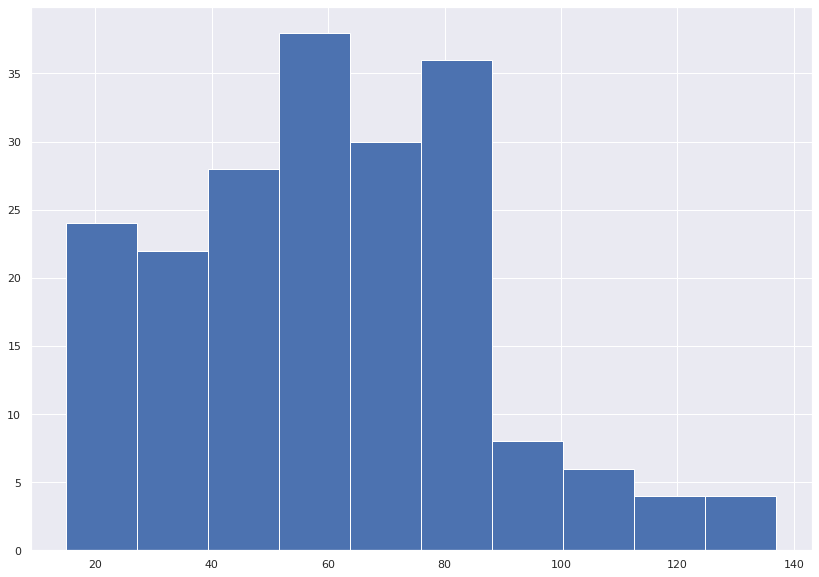

In [ ]:
plt.figure(figsize=(14,10))  #figuresize define
sns.set(font_scale=1) #fontsize 
plt.hist(data=df,x='Annual_Income')
plt.show()

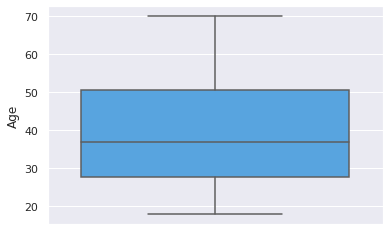

In [ ]:
sns.boxplot(y=df[df['Gender']=='Male']['Age'], color="#42a7f5")

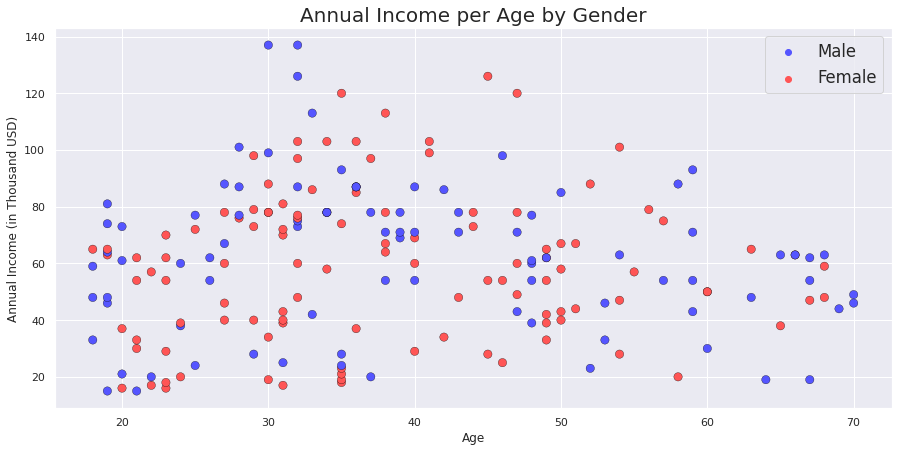

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

sns.set(font_scale=1.5) 
ax = sns.scatterplot (y=df['Annual_Income'], x=df['Age'], hue=df['Gender'], palette='seismic', s=70, edgecolor='black', linewidth=0.3) 
ax.set_ylabel('Annual Income (in Thousand USD)') 
ax.legend (loc='upper right') 
plt.title('Annual Income per Age by Gender', fontsize = 20) 
plt.show()

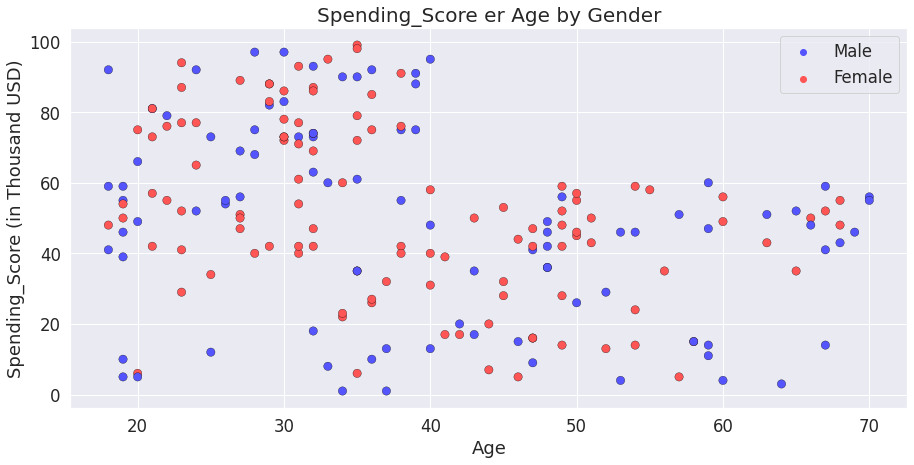

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

sns.set(font_scale=1.5) 
ax = sns.scatterplot (y=df['Spending_Score'], x=df['Age'], hue=df['Gender'], palette='seismic', s=70, edgecolor='black', linewidth=0.3) 
ax.set_ylabel('Spending_Score (in Thousand USD)') 
ax.legend (loc='upper right') 
plt.title('Spending_Score er Age by Gender', fontsize = 20) 
plt.show()

In [ ]:
cluster_data=df.iloc[:,[2,3]]

In [ ]:
cluster_data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


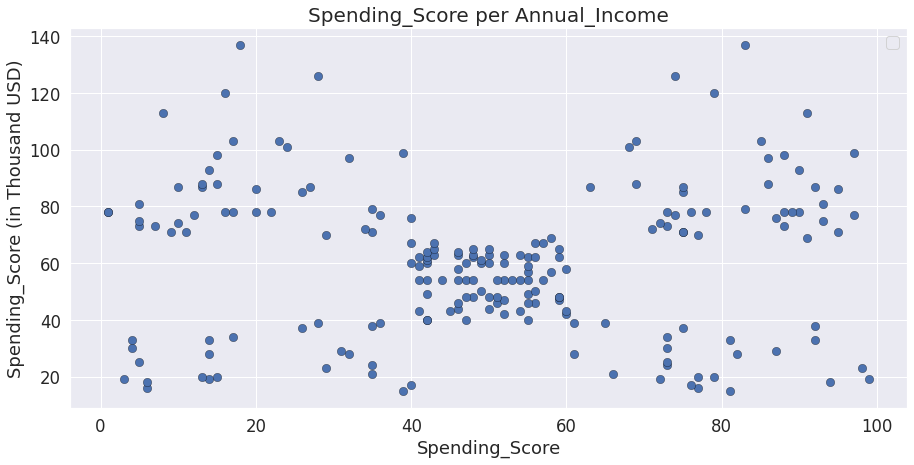

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

sns.set(font_scale=1.5) 
ax = sns.scatterplot (y=cluster_data['Annual_Income'], x=cluster_data['Spending_Score'], palette='seismic', s=70, edgecolor='black', linewidth=0.3) 
ax.set_ylabel('Spending_Score (in Thousand USD)') 
ax.legend (loc='upper right') 
plt.title('Spending_Score per Annual_Income', fontsize = 20) 
plt.show()

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(cluster_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([269981.28      , 181363.5959596 , 106348.37306211,  73679.78903949,
        44448.45544793,  37233.81451071,  30273.39431207,  25018.57633478,
        21850.16528259,  19701.35225128,  18642.99126643,  16590.30387764,
        14300.04464163,  13201.6227932 ,  11746.86780106,  11252.48912052,
        10238.11546173,   9168.39542704,   8945.20032051,   8044.55505051,
         7568.68306971,   7212.89415584,   6880.29328866,   6519.82339287,
         6010.36562792,   5857.73076923,   5536.42551615,   5248.10569986,
         4860.97996411])

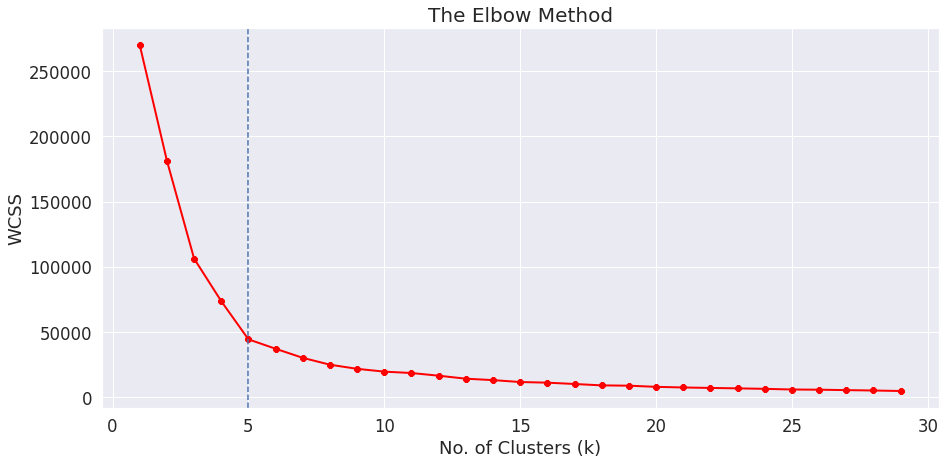

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

ax = plt.plot(range(1,30), wcss, linewidth=2, color="red", marker = "8")

plt.axvline(x=5,ls='--')

plt.ylabel('WCSS')

plt.xlabel('No. of Clusters (k)')

plt.title('The Elbow Method', fontsize = 20)

plt.show()

In [ ]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(cluster_data)

KMeans(n_clusters=5)

Now we have the clusters created, we will enter them into a different column

In [ ]:
clusters = cluster_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(cluster_data)
clusters.head()

,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


In [ ]:
#We can also get the centroids of the clusters by the cluster_centers_ attribute of KMeans algorithm.

kms.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

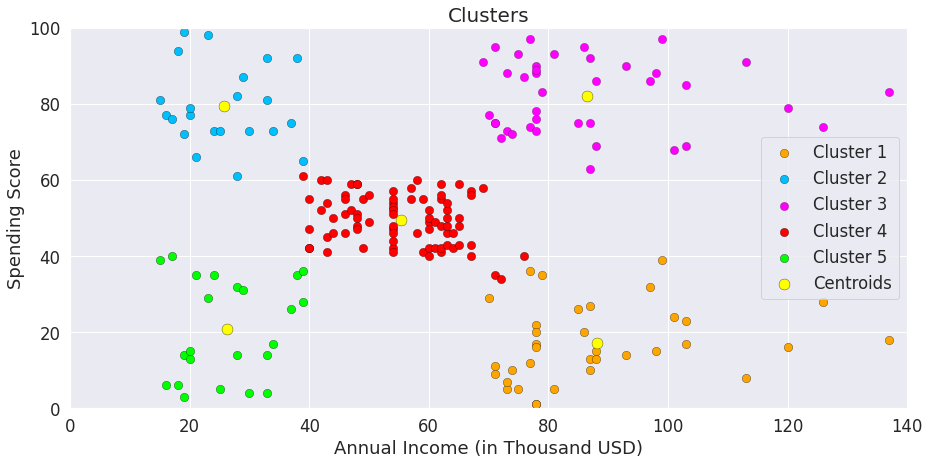

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

Cluster5 - Balanced Customers :
They earn less and spend less.

Cluster2 - Pinch Penny Customers :
Earning high and spending less. 

Cluster4 - Normal Customer :
Customers are average in terms of earning and spending 

Cluster1 - Spenders :
This type of customers earns less but spends more

Cluster3 - Target Customers :
Earning high and also spending high Target Customers